**Used Car Analysis - Using CRISP-DM**

CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology consists of six main stages: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment.

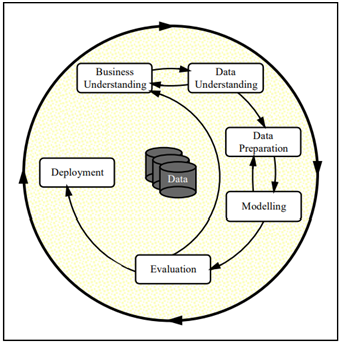

Here's a step-by-step approach using CRISP_DM for used Car price prediction :


**1. Business Understanding**
The goal is to analyze the dataset and identify key features that influence the price of used cars. These insights will allow the dealership to adjust their inventory accordingly, potentially focusing on more in-demand car types and features.

Key questions to answer:

1. What factors most affect car prices (e.g., brand, age, mileage, fuel type)?
2. Are there market trends in terms of car features that influence price more than others?
3. Are there market trends in terms of car features that influence price more than others?
4. How can this information help optimize inventory choices?


**2. Data Understanding**

The next step is to explore the dataset provided and gain insights into its structure, quality, and any initial patterns. Since the dataset contains information on 426K cars, we need to load and inspect the data to better understand what it contains and how it can be used.

Steps to take:

**Load the dataset:** Load the dataset and check for its basic structure, including the number of rows, columns, and types of variables.

**Examine data quality:** Look for missing values, duplicate entries, or inconsistent data points (e.g., negative mileage, unrealistic prices).

**Data types:** Check whether categorical variables (e.g., car make, fuel type) are properly encoded and if numerical variables (e.g., price, mileage) are in the correct format.

**Basic statistical analysis:** Generate basic descriptive statistics (mean, median, standard deviation) to understand the distribution of variables like car prices, mileage, and other continuous features.


In [1]:
# All library imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import datetime #to calculate the age of car based on year
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Data Understanding
#Load the Data Set and check for its basic structure, including the number of rows, columns, and types of variables.

df = pd.read_csv('/content/drive/MyDrive/Berkley/mlai/Module11/UsedCar_CRISPDM/practical_application_II_starter/data/vehicles.csv')
df.head()

print("Number of rows and columns:", df.shape)
print("\nData types of each column:\n", df.dtypes)
print("\nFirst few rows of the data:\n", df.head())  # Shows the first 5 rows by default
print("\nSummary statistics for numeric columns:\n", df.describe())
print("\nInformation about the DataFrame (including missing values):\n", df.info())



Number of rows and columns: (426880, 18)

Data types of each column:
 id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

First few rows of the data:
            id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cyl

Missing Values per column:
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

Percentage of Missing Values per column:
 id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64
after dropna - Numb

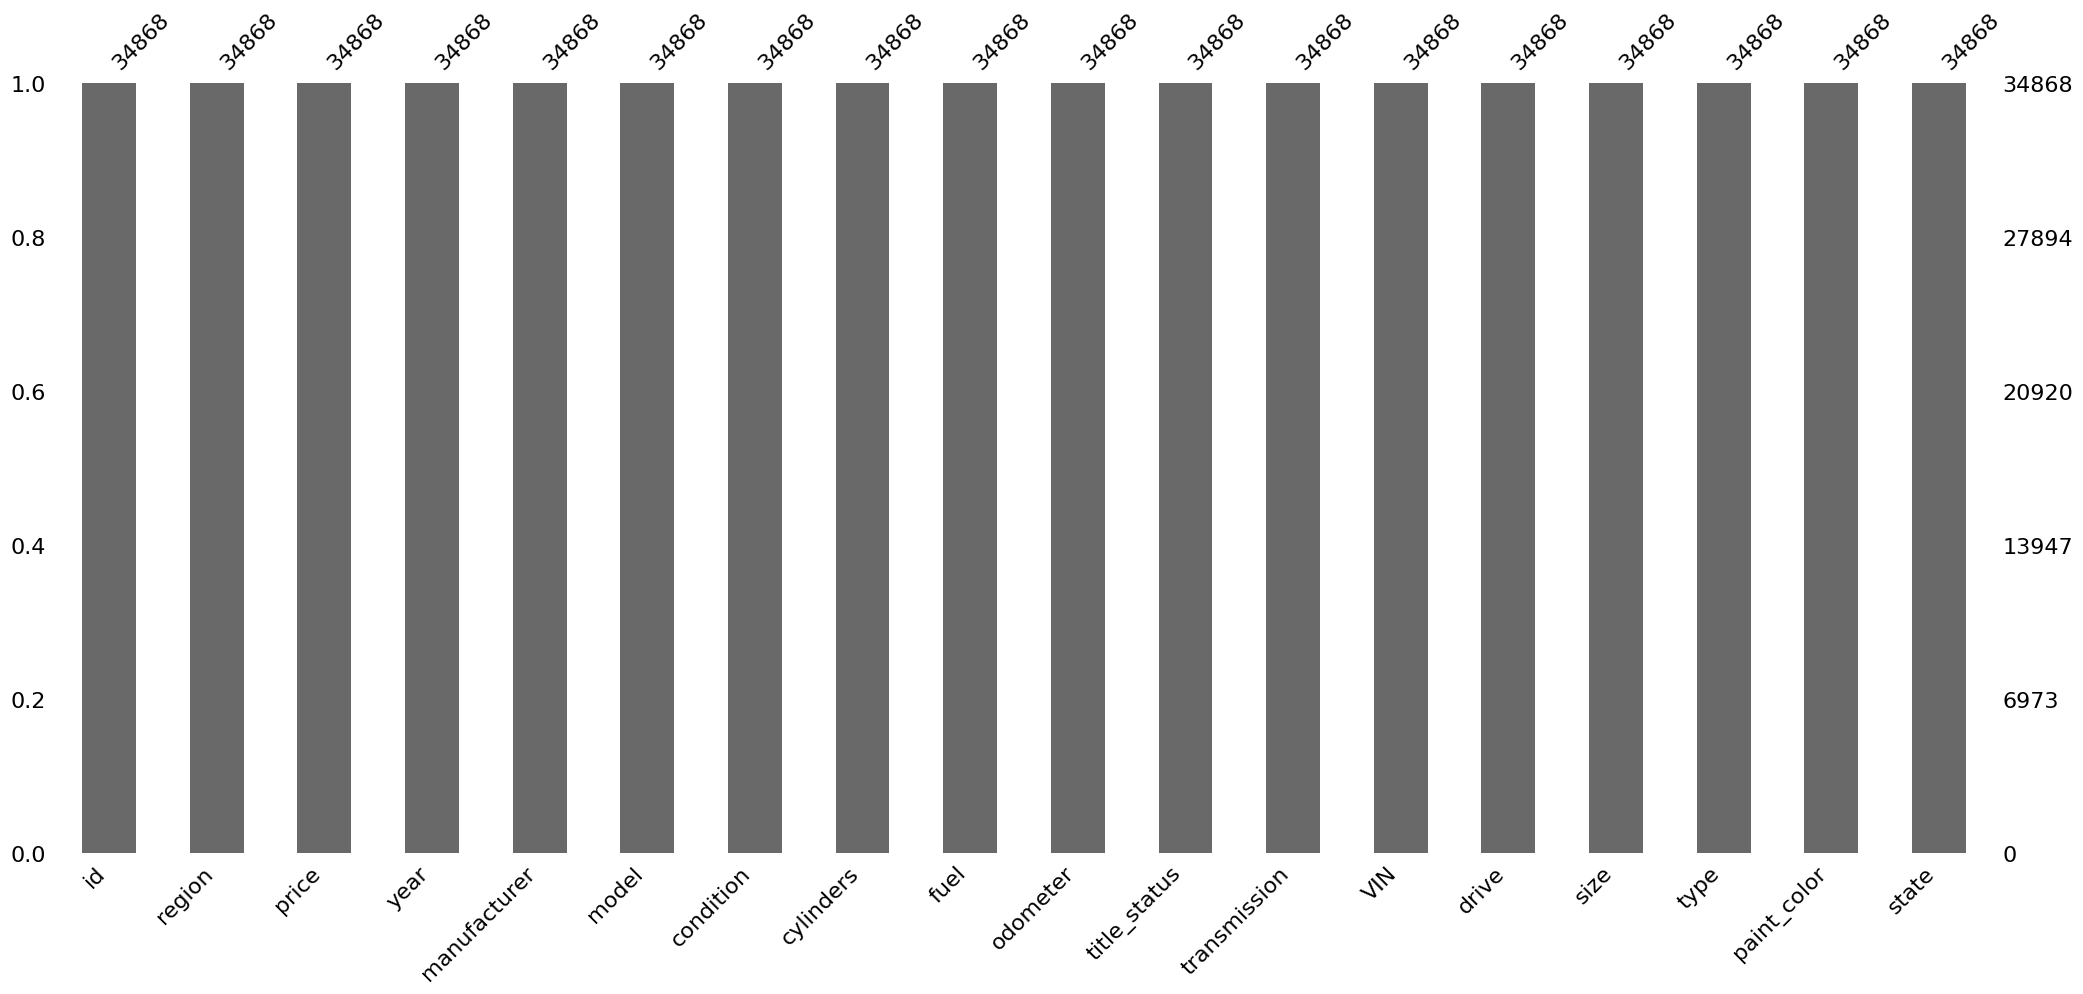

In [3]:
#Examine data quality: Look for missing values, duplicate entries, or inconsistent data points (e.g., negative mileage, unrealistic prices).
# 1. Missing Values

print("Missing Values per column:\n", df.isnull().sum())  # Number of missing values per column
print("\nPercentage of Missing Values per column:\n", (df.isnull().sum() / len(df)) * 100) # Percentage of missing values per column

# Missing value Observations
# Size - shows only 306361 around 30% of values, 70% values are missing
# Condition, Cylinders, Paint_color, type are also having missing values.
# Model, Ododmeter, Title Status are all having few missing values
# Region, Price, Year, Transmission, State are almost not having missing values

# remove NaN rows
df1 = df.dropna()
msno.bar(df1)
print("after dropna - Number of rows and columns:", df1.shape)

#Duplicate Entries
print("\nDuplicated values:\n", df1.duplicated().sum()) # count of unique values

#Unique Entries
print("\nUnique values:\n", df1.nunique()) # count of unique values


#Inconsistent Data Points and cleanup

#Negative Mileage (replace 'mileage' with your actual column name)
print("\nNegative Mileage:\n", df1[df1['odometer'] < 0])
df1 = df1[df1['odometer'] >= 0] # To remove rows with negative mileage
df1=df1.dropna(subset=['odometer']) # To remove rows with missing values in the 'odometer' column

# Unrealistic Prices (replace 'price' with your actual column name)
print("\nUnrealistic Prices (e.g., > 100000 or < 0):\n", df1[(df1['price'] > 100000) | (df1['price'] < 0)])
df1 = df1[(df1['price'] <= 100000) & (df1['price'] >= 0)] # Remove rows with unrealistic prices

# Drop irrelevant columns
df1.drop(['id', 'VIN', 'region', 'size'], axis=1, inplace=True)


In [4]:
#Generate basic descriptive statistics (mean, median, standard deviation) to understand the distribution of variables like car prices and odometer.

# Calculate mean, median, and standard deviation for 'price'
mean_price = df1['price'].mean()
median_price = df1['price'].median()
std_price = df1['price'].std()

# Calculate mean, median, and standard deviation for 'odometer'
mean_odometer = df1['odometer'].mean()
median_odometer = df1['odometer'].median()
std_odometer = df1['odometer'].std()

# Print the results
print("Price - Mean:", mean_price, "Median:", median_price, "Standard Deviation:", std_price)
print("Odometer - Mean:", mean_odometer, "Median:", median_odometer, "Standard Deviation:", std_odometer)

Price - Mean: 15783.663022581848 Median: 12000.0 Standard Deviation: 13237.980312167198
Odometer - Mean: 107439.06083039223 Median: 104081.0 Standard Deviation: 99910.27433760391


**3. Data Preparation**

Next is to prepare the dataset for modeling. This involves data cleaning, transformation, and feature engineering.

Steps to take:

**Handle missing data:** Decide whether to fill in missing values (imputation) or remove rows/columns with too many missing entries.

**Encode categorical variables:** Convert categorical variables like car make, model, and fuel type into numeric representations (e.g., one-hot encoding).

**Feature scaling:** If necessary, scale numerical features (e.g., mileage, age) to ensure the model performs optimally.

**Outlier detection: **Identify and handle outliers that may skew model performance (e.g., very high or low prices).

**Create new features:** Consider creating new features based on existing ones. For example, you could derive the car's age from the year of manufacture.


In [5]:
#Data types: Check whether categorical variables (e.g., car make, fuel type) are properly encoded and if numerical variables (e.g., price, odometer) are in the correct format.

# Categorical data with inconsistent entries
categorical_col = ['manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
for col in categorical_col:
  print(f"\nCategory in {col} is: {df1[col].unique()}")
  df1[col] = df1[col].str.strip() # Remove leading/trailing spaces
  df1[col] = df1[col].str.lower() # Convert to lowercase
  print(df1[col].value_counts())
  print("#" * 40)



Category in manufacturer is: ['chevrolet' 'toyota' 'bmw' 'mazda' 'ford' 'mercedes-benz' 'ferrari'
 'lexus' 'audi' 'mitsubishi' 'infiniti' 'nissan' 'volkswagen' 'honda'
 'ram' 'hyundai' 'fiat' 'cadillac' 'jeep' 'gmc' 'jaguar' 'volvo' 'dodge'
 'kia' 'chrysler' 'subaru' 'acura' 'mini' 'buick' 'rover' 'lincoln'
 'porsche' 'saturn' 'harley-davidson' 'pontiac' 'mercury' 'tesla'
 'alfa-romeo' 'datsun' 'land rover' 'aston-martin']
manufacturer
ford               7410
chevrolet          5338
toyota             2886
honda              1894
nissan             1704
ram                1616
gmc                1542
jeep               1365
dodge               977
bmw                 927
subaru              918
mercedes-benz       853
hyundai             763
volkswagen          731
kia                 635
lexus               600
chrysler            538
cadillac            518
audi                450
mazda               404
buick               388
mitsubishi          335
lincoln             258
acura  

In [6]:
# Numerical/Continous Feature
#price (int64): The price of the vehicle.
#year (float64): The year the vehicle was manufactured.
#odometer (float64): The number of miles the vehicle has been driven.

# Incorrect Data Types - 'price' should be numeric
print("\nData type of 'price' column:\n", df1['price'].dtype)
df1['price'] = pd.to_numeric(df1['price'],downcast='float', errors='coerce') # Convert 'price' to float, setting invalid values to NaN
print("\nMissing values after converting 'price' to numeric:\n", df1['price'].isnull().sum())
df1 = df1.dropna(subset=['price']) # Drop rows with missing values
print("\nafter conversion - Data type of 'price' column:\n", df1['price'].dtype)

# Incorrect Data Types - 'year' should be numeric
print("\nData type of 'year' column:\n", df1['year'].dtype)
df1['year'] = pd.to_numeric(df1['year'], downcast='integer', errors='coerce') # Convert 'year' to integer, setting invalid values to NaN
print("\nMissing values after converting 'year' to numeric:\n", df1['year'].isnull().sum())
df1 = df1.dropna(subset=['year']) # Drop rows with missing values
print("\nafter conversion Data type of 'year' column:\n", df1['year'].dtype)

# Incorrect Data Types - 'year' should be numeric
print("\nData type of 'odometer' column:\n", df1['odometer'].dtype)
df1['odometer'] = pd.to_numeric(df1['odometer'], downcast='integer', errors='coerce') # Convert 'odometer' to integer, setting invalid values to NaN
print("\nMissing values after converting 'odometer' to numeric:\n", df1['odometer'].isnull().sum())
df1 = df1.dropna(subset=['odometer']) # Drop rows with missing values
print("\nafter conversion data type of 'odometer' column:\n", df1['odometer'].dtype)

for col in df1.select_dtypes(include=['float64']):
    df1[col] = pd.to_numeric(df1[col], downcast='float')

for col in ['manufacturer', 'model', 'fuel', 'condition', 'title_status',
                   'transmission', 'drive', 'type', 'paint_color', 'state', 'cylinders']:
    df1[col] = df1[col].astype('category')


Data type of 'price' column:
 int64

Missing values after converting 'price' to numeric:
 0

after conversion - Data type of 'price' column:
 float32

Data type of 'year' column:
 float64

Missing values after converting 'year' to numeric:
 0

after conversion Data type of 'year' column:
 int16

Data type of 'odometer' column:
 float64

Missing values after converting 'odometer' to numeric:
 0

after conversion data type of 'odometer' column:
 int32


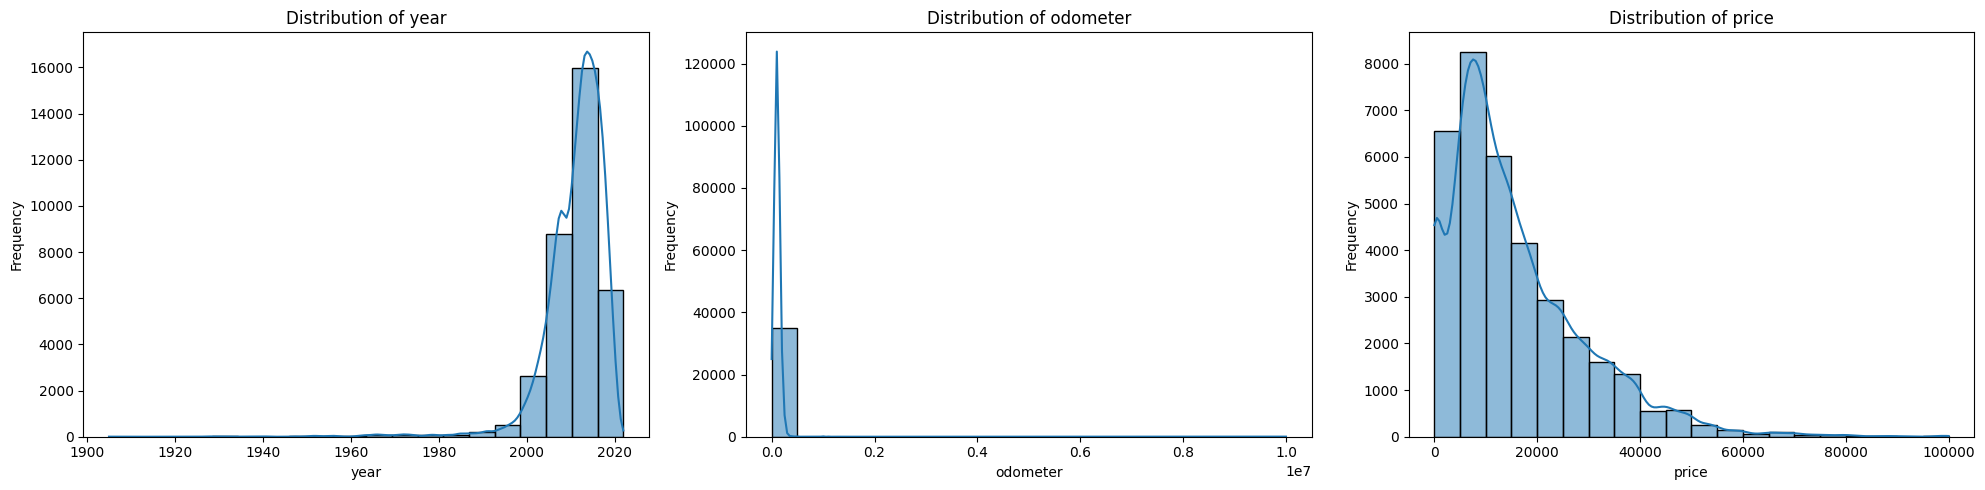

In [7]:
numerical_features=['year', 'odometer', 'price']

plt.figure(figsize=(20, 5))
for feature in numerical_features:
    plt.subplot(1, 3, numerical_features.index(feature) + 1)
    sns.histplot(df1[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



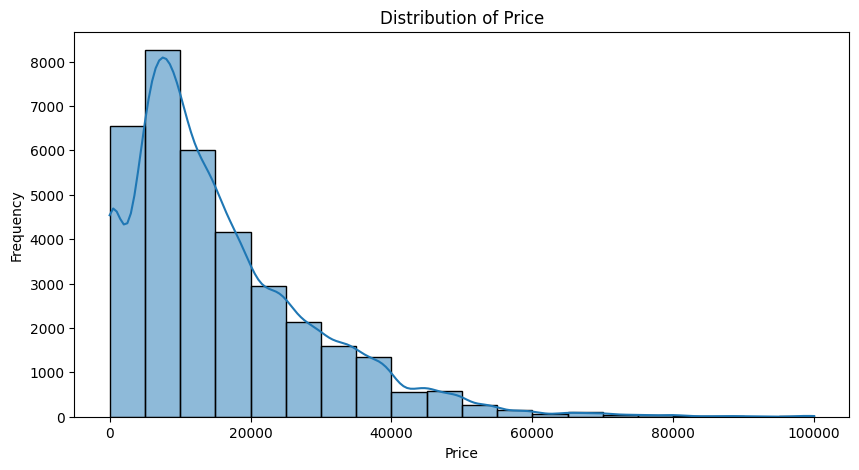

In [8]:
#Analysis of Price

plt.figure(figsize=(10, 5))
sns.histplot(df1['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

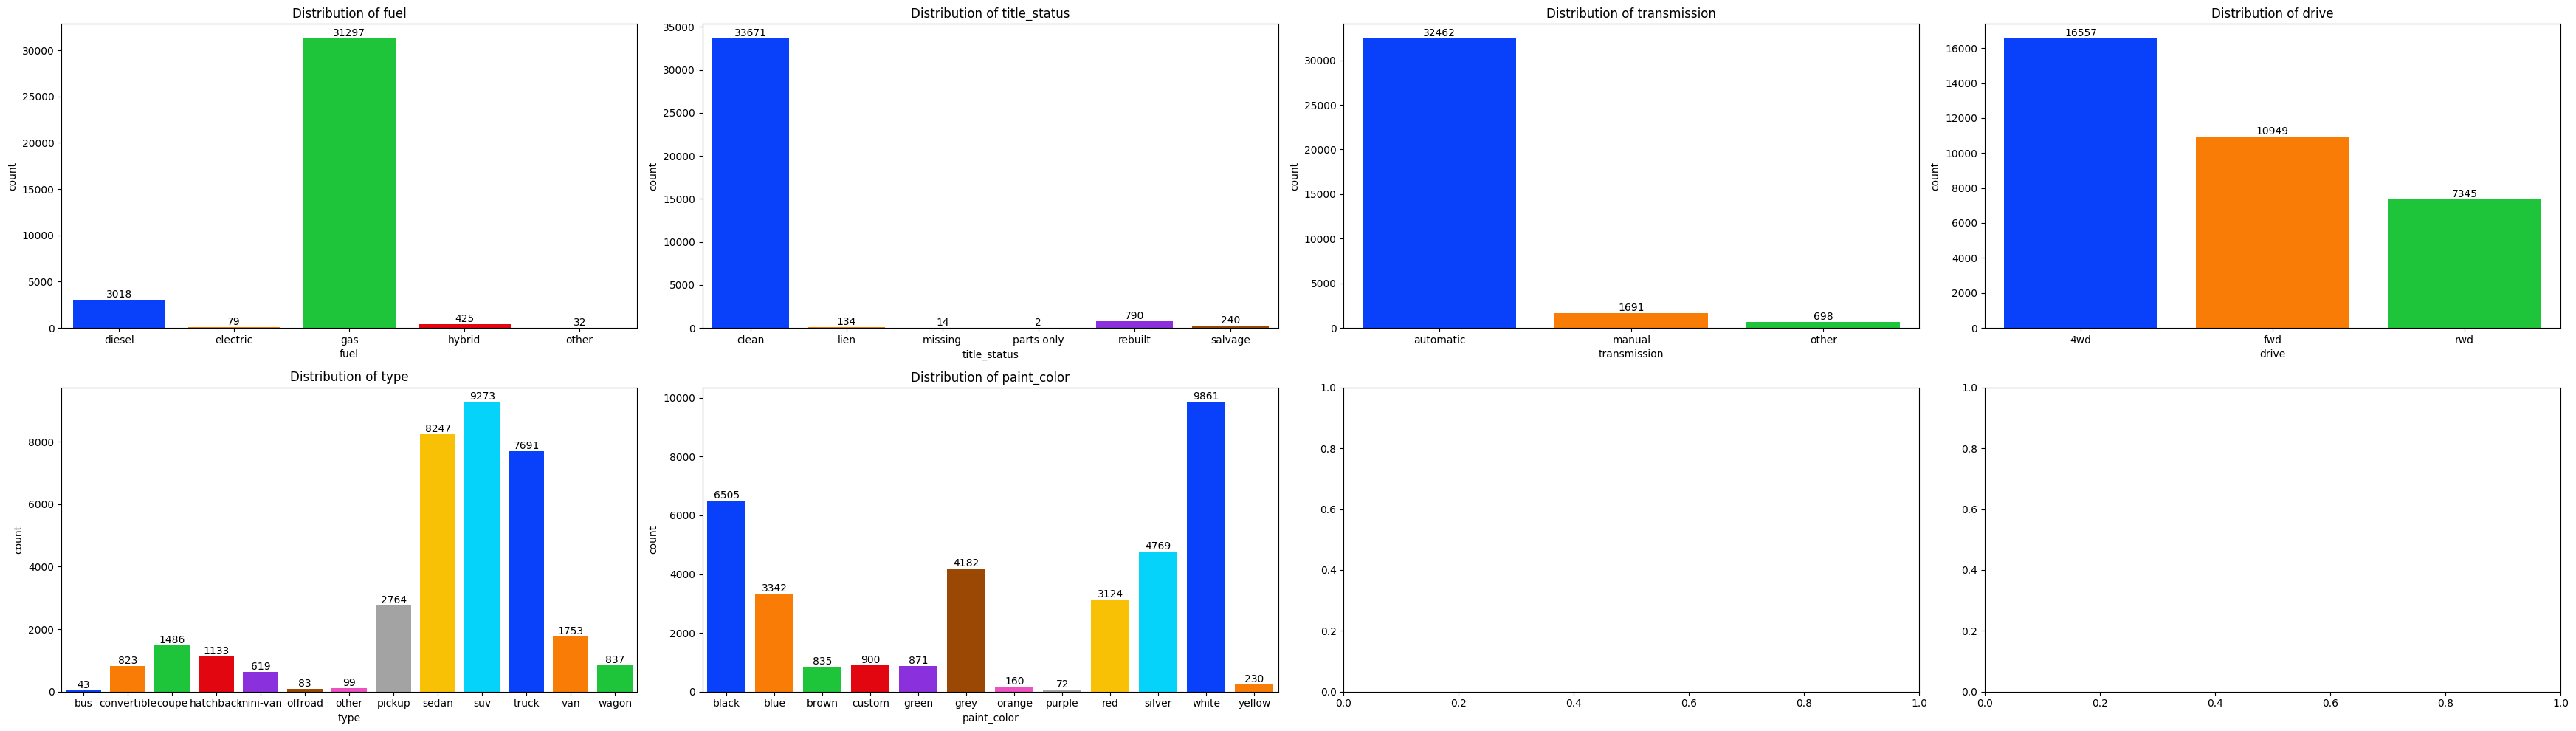

In [9]:
#Categorical feature visualization classified into two based on the data
categorical_features=['fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

#create sub plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(35, 10))
axes=axes.ravel()

for i ,column in enumerate(categorical_features):
  sns.countplot(data=df1, x=df1[column], ax=axes[i], palette='bright', saturation=0.95)
  for container in axes[i].containers:
    axes[i].bar_label(container,color='black', size=10)
  axes[i].set_title(f'Distribution of {column}')
  axes[i].set_xlabel(column)
  axes[i].set_ylabel('count')

plt.tight_layout()
plt.show()

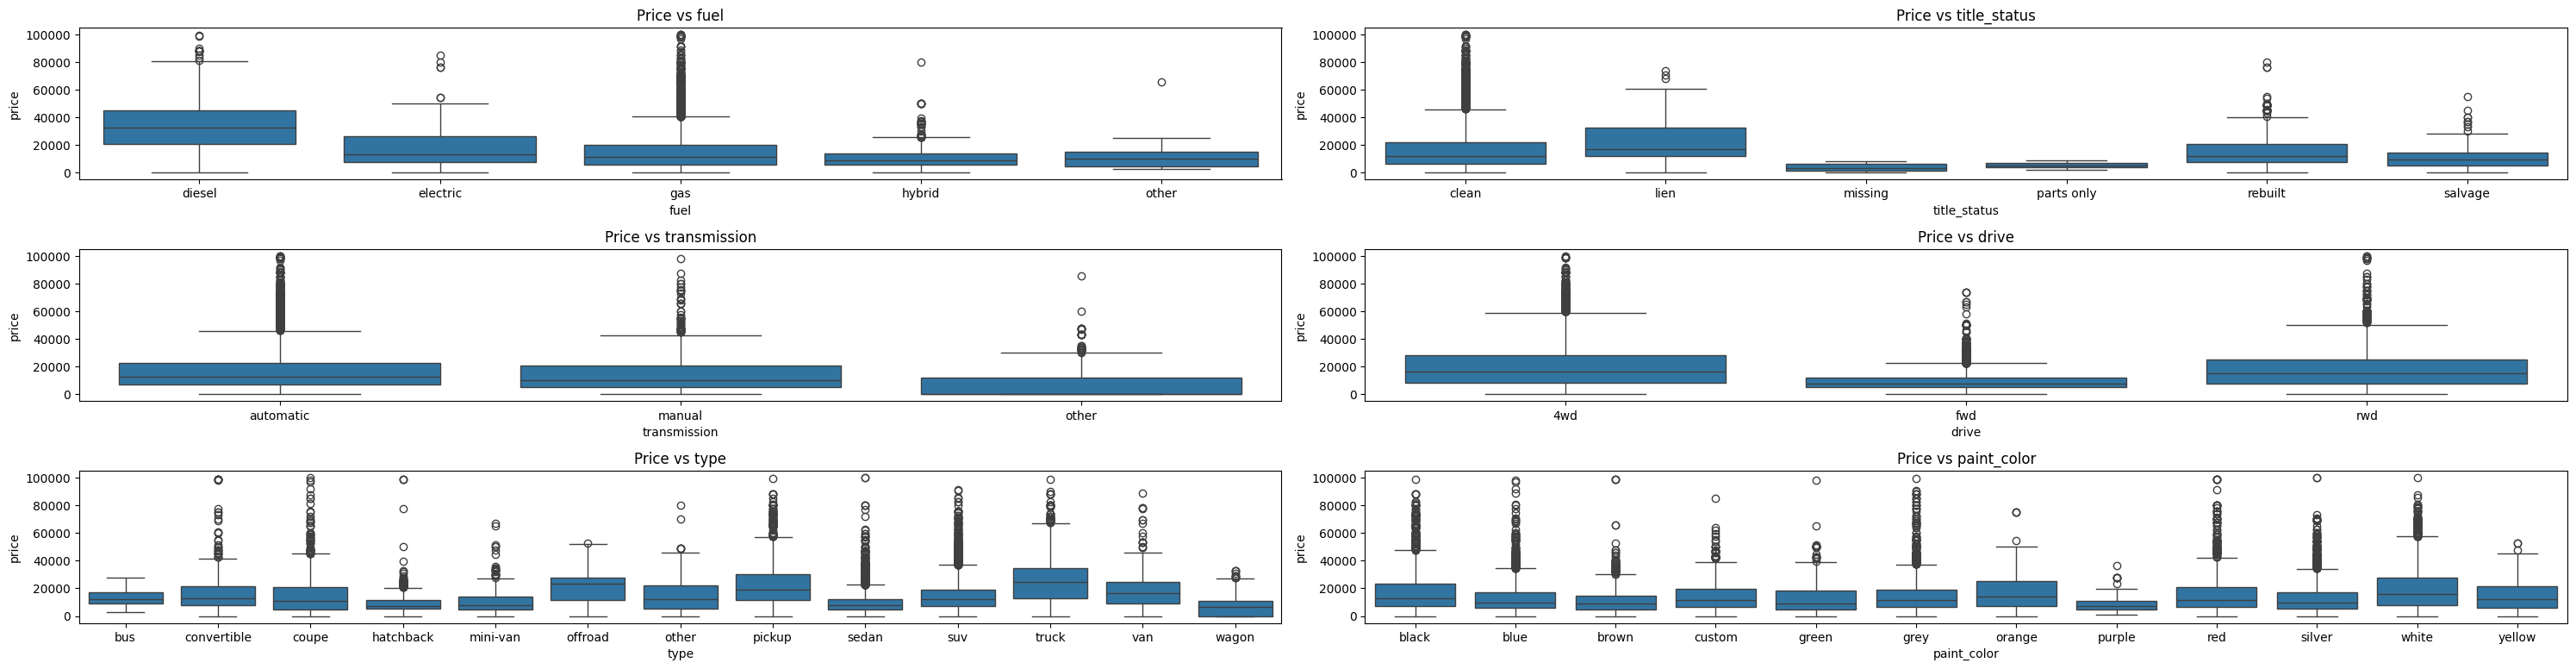

In [12]:
#Categorical feature Vs Price
categorical_features2=['fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
plt.figure(figsize=(30, 10))
for feature in categorical_features2:
    plt.subplot(4,2,categorical_features2.index(feature)+1)
    sns.boxplot(x=feature, y='price', data=df1)
    plt.title(f'Price vs {feature}')
plt.tight_layout()
plt.show()




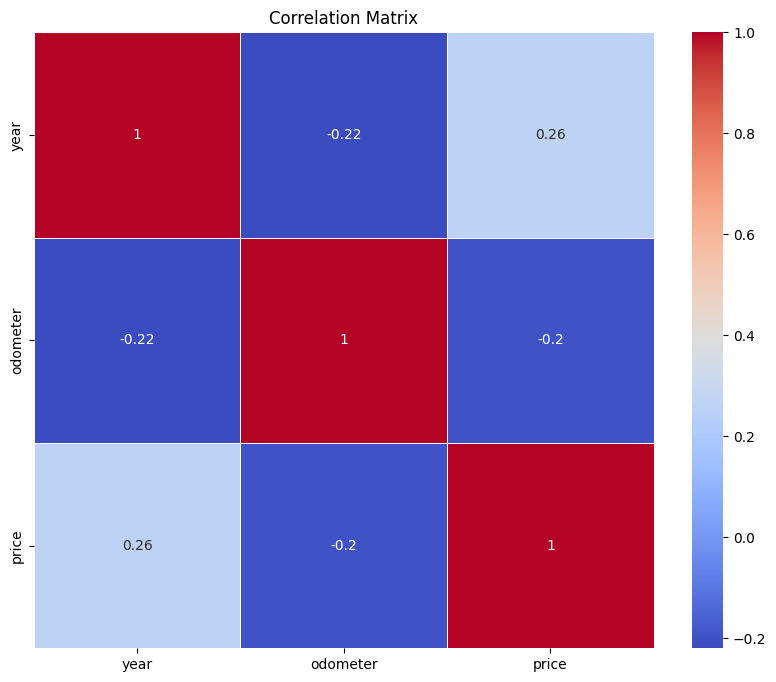

     car_age  odometer   price  manufacturer_acura  manufacturer_alfa-romeo  \
126      7.0   68472.0     0.0                 0.0                      0.0   
127      6.0   69125.0     0.0                 0.0                      0.0   
128      7.0   66555.0     0.0                 0.0                      0.0   
215     23.0  155000.0  4000.0                 0.0                      0.0   
219     30.0  110661.0  2500.0                 0.0                      0.0   

     manufacturer_aston-martin  manufacturer_audi  manufacturer_bmw  \
126                        0.0                0.0               0.0   
127                        0.0                0.0               0.0   
128                        0.0                0.0               0.0   
215                        0.0                0.0               0.0   
219                        0.0                0.0               0.0   

     manufacturer_buick  manufacturer_cadillac  ...  state_wv  state_wy  \
126                 0.0

In [14]:
# One hot encoding for numerical feature
# Correlation Analysis

corr_matrix = df1[numerical_features]
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# One hot encoding for categorical feature

from sklearn.preprocessing import OneHotEncoder
# Identify categorical columns
categorical_cols = ['manufacturer', 'model', 'fuel', 'condition', 'title_status',
                   'transmission', 'drive',  'type', 'paint_color', 'state',  'cylinders']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the categorical data
encoder.fit(df1.loc[:,['manufacturer', 'model', 'fuel', 'condition', 'title_status',
                   'transmission', 'drive',  'type', 'paint_color', 'state',  'cylinders']])

# Transform the categorical features into one-hot encoded features
encoded_features = encoder.transform(df1.loc[:,['manufacturer', 'model', 'fuel', 'condition', 'title_status',
                   'transmission', 'drive', 'type', 'paint_color', 'state','cylinders']])

# Create a new DataFrame with the one-hot encoded features
encoded_df = pd.DataFrame(encoded_features)
encoded_df.columns = encoder.get_feature_names_out(['manufacturer', 'model', 'fuel', 'condition', 'title_status',
                   'transmission', 'drive', 'type', 'paint_color', 'state', 'cylinders'])
# Get the current year
current_year = datetime.datetime.now().year

# Calculate car age
df1['car_age'] = current_year - df1['year']

numerical_features_df=df1[['car_age', 'odometer', 'price']]
# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([numerical_features_df, encoded_df], axis=1)


# Print the first few rows of the encoded DataFrame
print(df_encoded.head())


In [15]:


# Print the first few rows with the new feature
print(df1[['year', 'car_age']].head())

# Select numerical features for scaling
numerical_features = ['price', 'odometer', 'car_age']

# Initialize scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Apply StandardScaler (standardization)
df1[numerical_features] = standard_scaler.fit_transform(df1[numerical_features])

# Alternatively, apply MinMaxScaler (normalization)
df1[numerical_features] = min_max_scaler.fit_transform(df1[numerical_features])

# Print the first few rows of the scaled data
print(df1.head())

     year  car_age
126  2018        7
127  2019        6
128  2018        7
215  2002       23
219  1995       30
        price  year manufacturer              model  condition    cylinders  \
126  0.000000  2018    chevrolet  express cargo van   like new  6 cylinders   
127  0.000000  2019    chevrolet  express cargo van   like new  6 cylinders   
128  0.000000  2018    chevrolet  express cargo van   like new  6 cylinders   
215  0.040004  2002       toyota               echo  excellent  4 cylinders   
219  0.025003  1995          bmw               525i       fair  6 cylinders   

    fuel  odometer title_status transmission drive   type paint_color state  \
126  gas  0.006847        clean    automatic   rwd    van       white    al   
127  gas  0.006913        clean    automatic   rwd    van       white    al   
128  gas  0.006656        clean    automatic   rwd    van       white    al   
215  gas  0.015500        clean    automatic   fwd  sedan        blue    al   
219  gas  0.0110

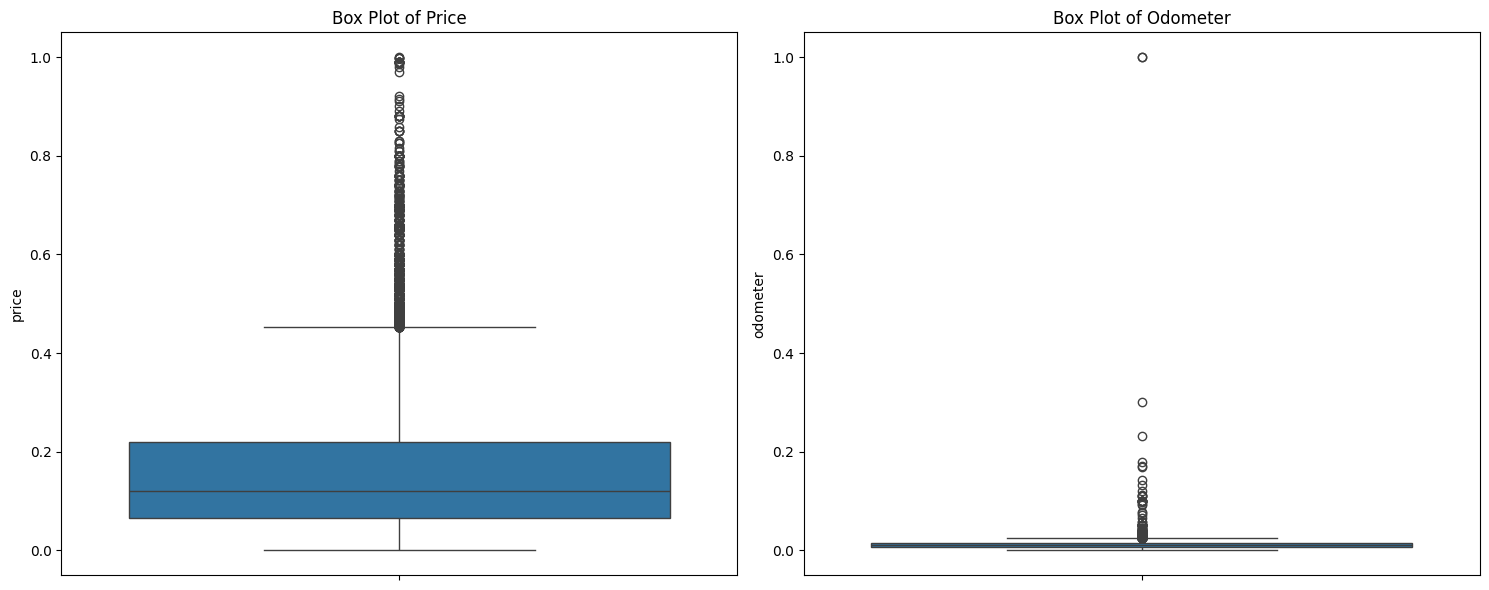

In [16]:
#Outlier detection: Identify and handle outliers that may skew model performance (e.g., very high or low prices).

# Create box plots for 'price' and 'odometer'
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df1['price'])
plt.title('Box Plot of Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=df1['odometer'])
plt.title('Box Plot of Odometer')

plt.tight_layout()
plt.show()

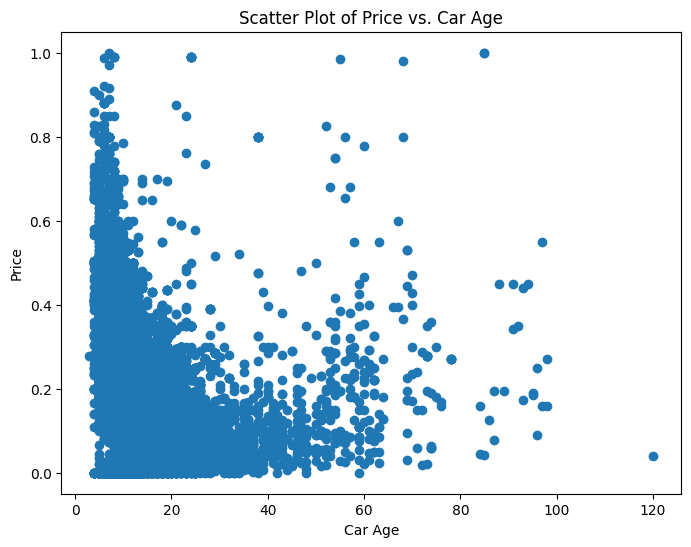

In [17]:
# Get the current year
current_year = datetime.datetime.now().year

# Calculate car age
df1['car_age'] = current_year - df1['year']

plt.figure(figsize=(8, 6))
plt.scatter(df1['car_age'], df1['price'])
plt.xlabel('Car Age')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Car Age')
plt.show()

**Modeling**

After preparing the data, you will proceed to build predictive models to understand how features affect car prices.

Steps to take:

**Select models:** linear regression

**Train and validate models:** Split the dataset into training and testing sets.
Train the model on the training data and validate it using the testing data.

**Evaluate model performance:** Evaluate the models using appropriate metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared, to see how well they predict car prices.


In [18]:
#Linear regression model

# Select features and target variable
df_encoded.info()


encoded_features = df_encoded.columns.tolist()
encoded_features.remove('price')


df_sampled = df_encoded.sample(frac=0.2, random_state=42)  # Sample 50% of the data
df_sampled = df_sampled.dropna()

# Select features and target variable from the sampled data
X_sampled = df_sampled[encoded_features]
y_sampled = df_sampled['price']


# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

<class 'pandas.core.frame.DataFrame'>
Index: 67186 entries, 126 to 34850
Columns: 5280 entries, car_age to cylinders_other
dtypes: float32(1), float64(5279)
memory usage: 2.6 GB
Mean Squared Error: 664319962.6844393
R-squared: -3.9602328277333703


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 95193894.02320598
R-squared: 0.28922220517709873
